In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

In [ ]:
# Load your dataset
data = pd.read_csv('/content/fraudTrain.csv')  # Replace 'credit_card_data.csv' with your dataset file path

# **DATA PREPROCESSING**

In [ ]:
# Define the feature columns and target variable
features = ['amt', 'city_pop', 'merch_lat', 'merch_long']
target = 'is_fraud'


In [ ]:
# Define the imputer for numeric features
numeric_imputer = SimpleImputer(strategy='mean')

# Impute missing values in the training set
X_train = numeric_imputer.fit_transform(X_train)
X_test = numeric_imputer.transform(X_test)

data.dropna(subset=features + [target], inplace=True)
X = data[features]
y = data[target]

# **DATA VISUALIZATION**

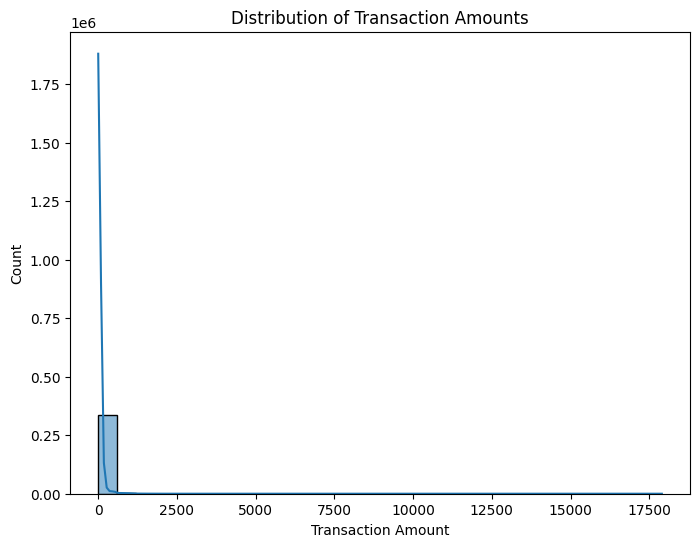

In [ ]:
# Histogram for Transaction Amounts
plt.figure(figsize=(8, 6))
sns.histplot(data['amt'], bins=30, kde=True)
plt.xlabel('Transaction Amount')
plt.title('Distribution of Transaction Amounts')
plt.show()


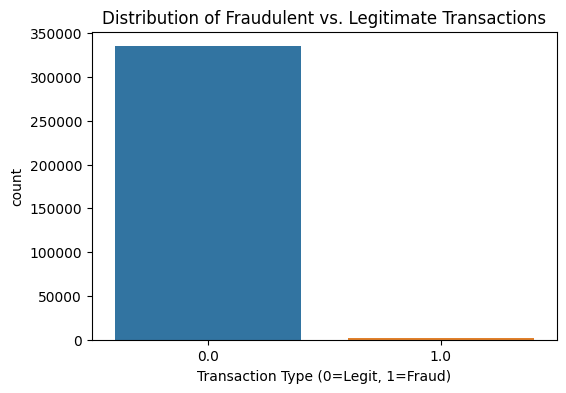

In [ ]:
# Bar Plot for Fraud vs. Legit Transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=data)
plt.xlabel('Transaction Type (0=Legit, 1=Fraud)')
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
plt.show()

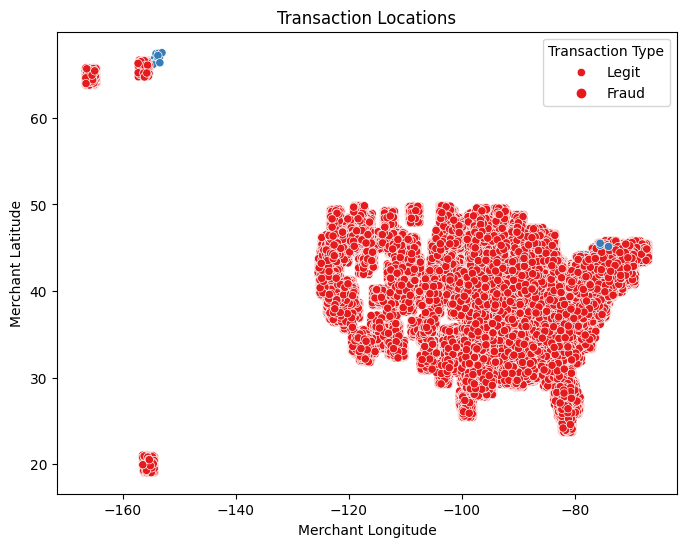

In [ ]:
# Scatter Plot for Latitude and Longitude
plt.figure(figsize=(8, 6))
sns.scatterplot(x='merch_long', y='merch_lat', data=data, hue='is_fraud', palette='Set1')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.title('Transaction Locations')
plt.legend(title='Transaction Type', labels=['Legit', 'Fraud'])
plt.show()

<ipython-input-45-8543db6a6018>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


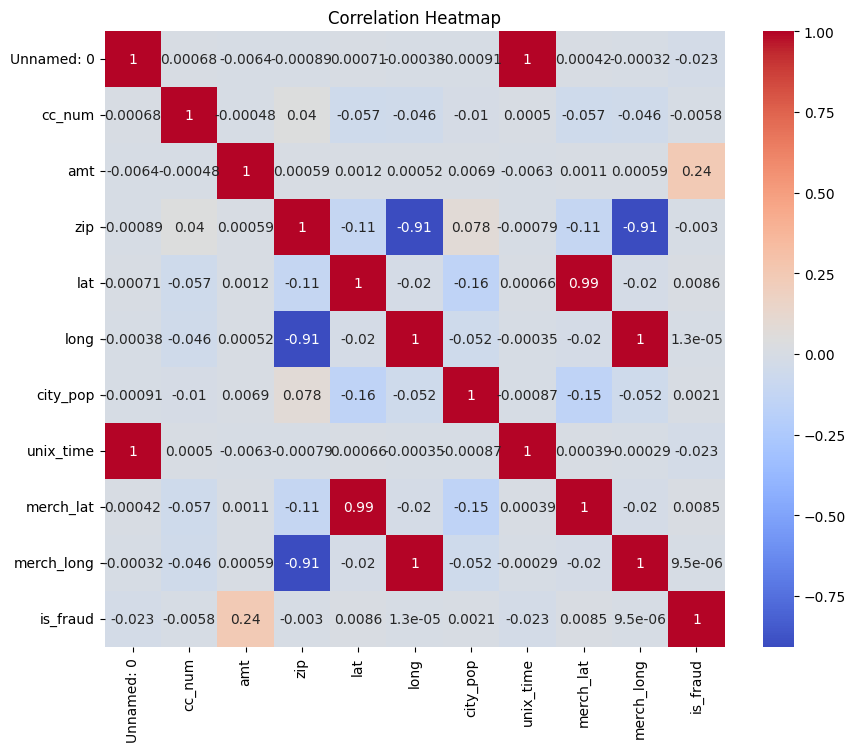

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

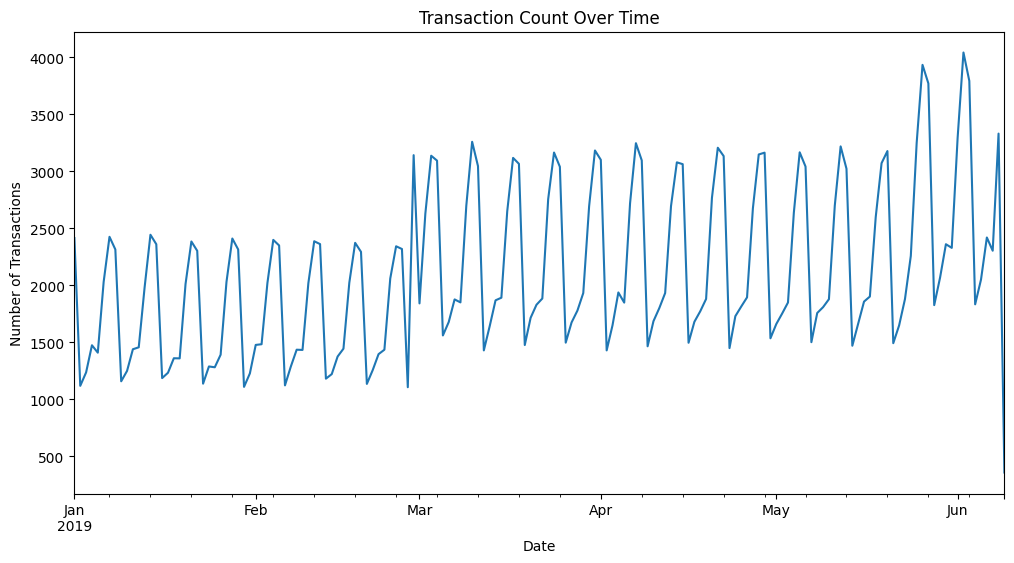

In [ ]:
# Time Series Plot for Transaction Date and Time
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data.set_index('trans_date_trans_time', inplace=True)
plt.figure(figsize=(12, 6))
data.resample('D').size().plot(legend=False)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transaction Count Over Time')
plt.show()

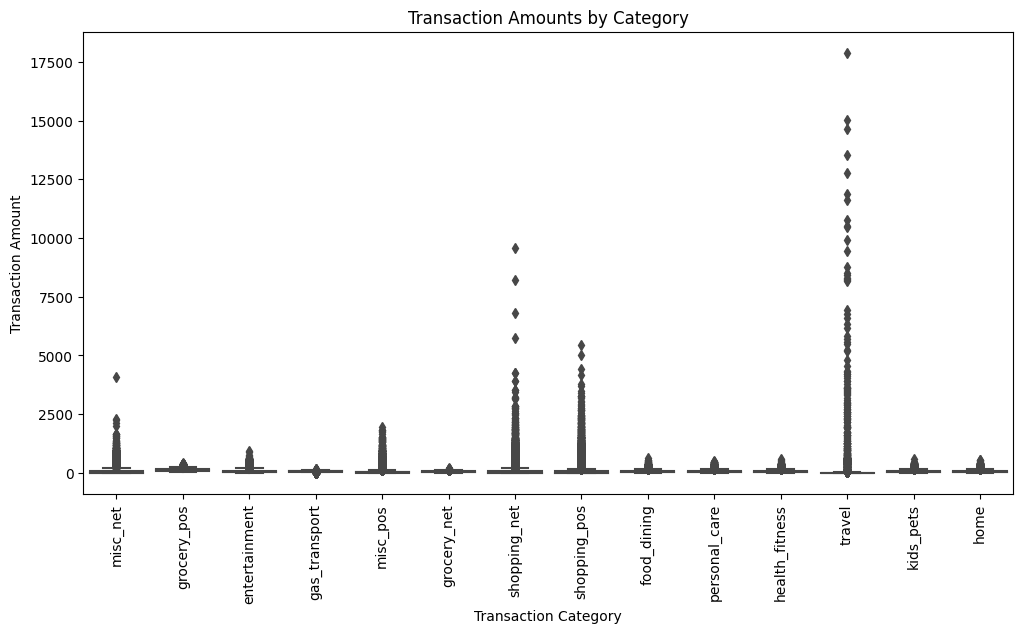

In [ ]:
# Box Plots for Transaction Amount by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', data=data)
plt.xticks(rotation=90)
plt.xlabel('Transaction Category')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amounts by Category')
plt.show()

# **MODEL**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)


# **EVALUATING THE REULTS**

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9941457197059521
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67013
         1.0       0.62      0.35      0.45       459

    accuracy                           0.99     67472
   macro avg       0.81      0.67      0.72     67472
weighted avg       0.99      0.99      0.99     67472



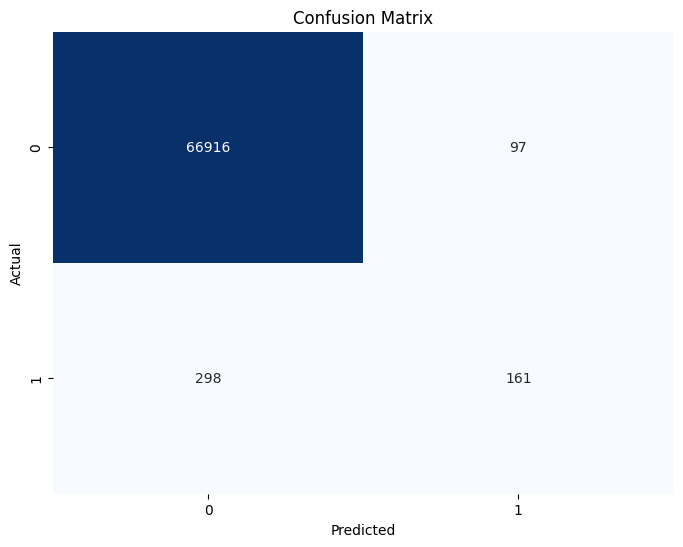

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

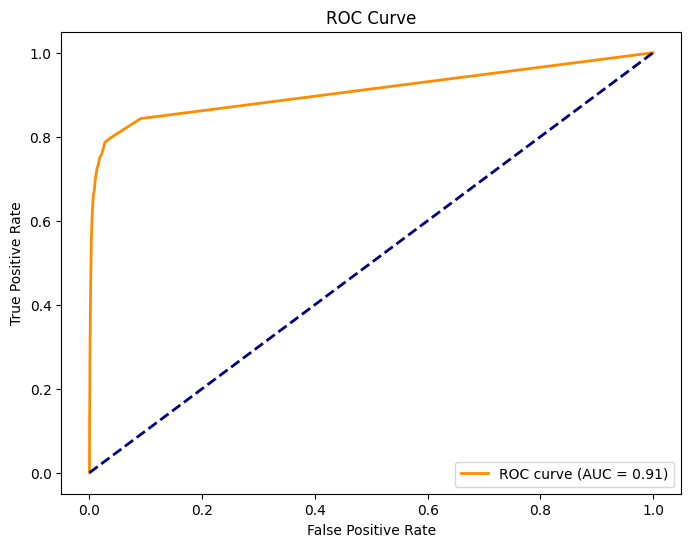

In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

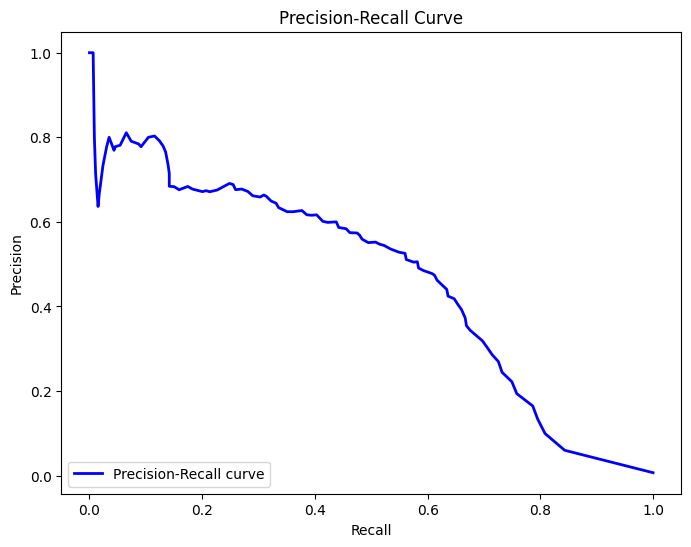

In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

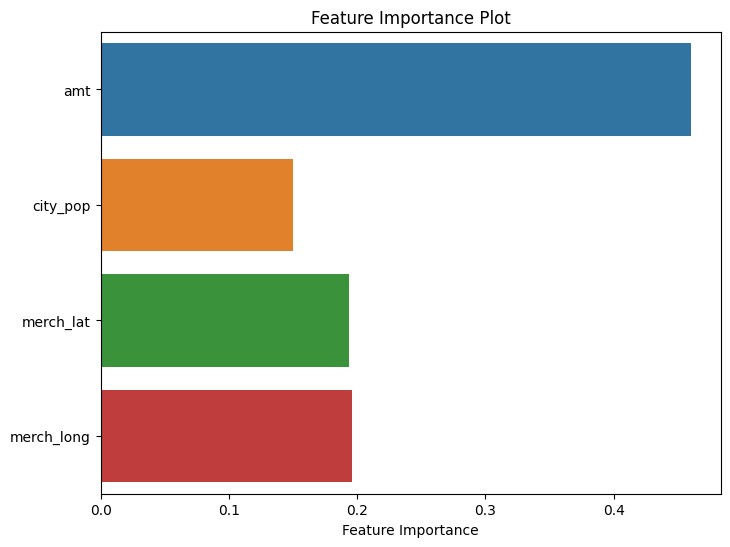

In [ ]:
# Feature Importance Plot
feature_importance = clf.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()